In [1]:
%pylab inline
np.random.seed(42)

def simulate_X(N):
    """
    theta = np.random.uniform(0, 2*pi, size=N)
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    X = np.power(np.sum(sin_theta)/N, 2) + np.power(np.sum(cos_theta)/N, 2)
    """
    theta = np.random.uniform(0, 2*np.pi, size=N)
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    sin_theta2 = np.power(np.sin(theta) , 2)
    cos_theta2 = np.power(np.cos(theta) , 2)
    #denominator = 1/N * (np.sum(sin_theta2) + np.sum(cos_theta2))
    X = (np.sum(sin_theta)/N)**2 + (np.sum(cos_theta)/N)**2
    return X

Populating the interactive namespace from numpy and matplotlib


In [112]:
denominator = 1/N * (np.sum(sin_theta2) + np.sum(cos_theta2))

In [113]:
denominator

1.0

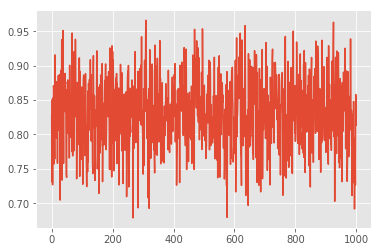

In [120]:
N = 10
Xs = []
for i in range(0, 1000):
    Xs.append(simulate_X(N))
    
#sns.kdeplot(Xs, cumulative=True)
plt.plot(Xs)

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


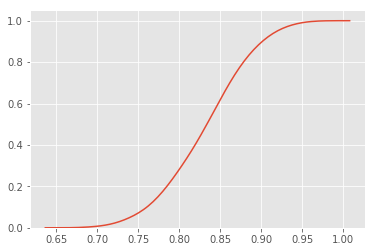

In [121]:
sns.kdeplot(Xs, cumulative=True)

\begin{align*}
X &= (\sum_{i=1}^N \sin \theta_i) ^2 + (\sum_{i=1}^N \cos \theta_i) ^2\\
\theta_i &\sim U(0, 2\pi)
\end{align*}

In [202]:
from scipy.stats import ncx2

 

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


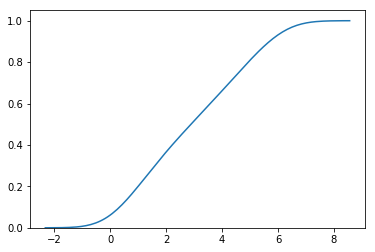

In [26]:
sns.kdeplot(theta, cumulative=True)


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

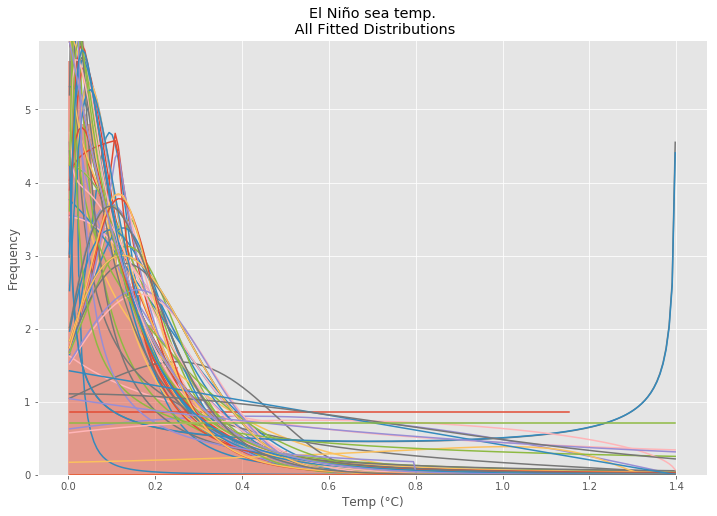

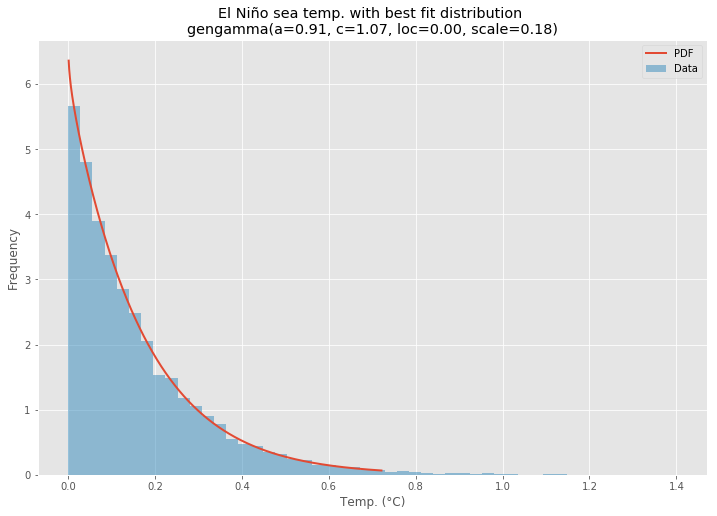

In [39]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(Xs)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [235]:
import scipy as sp
import scipy.integrate as integrate
import scipy.special as special

In [40]:
best_dist

In [186]:
a = np.linspace(1,4,10)

In [321]:
def _integrate_v2_v3(v2, v3):
    """Integrate p2(v2, v3)dv2
    
    Parameters
    ----------
    v3: float
    """    
    term1 = 4*v2 - v2**2
    term2 = 4*v2 - (v2-v3+1)**2
    #print(term1, term2)
    term = np.sqrt(1/(term1*term2))
    return term


def do_integration(v3):
    epsilon2 = min(4, (1+np.sqrt(v3))**2 )
    delta2 = (1-np.sqrt(v3))**2
    #print(delta2, epsilon2)
    I = integrate.quad(_integrate_v2_v3, delta2, epsilon2, args=(v3))
    return I[0]
     

In [397]:
def integral_p3(v3):
    #if v3<0 or v3>9:
    #    return 0
    epsilon2 = min(4, (1+np.sqrt(v3))**2 )
    delta2 = (1-np.sqrt(v3))**2
    I = integrate.quad(_integrate_v2_v3, delta2, epsilon2, args=(v3), limit=1000)
    return I[0]

def integral_p4(v4):
    #epsilon =  min((9-v4-1)/(2*np.sqrt(v4)), 1)
    #delta = max((-v4-1)/(2*np.sqrt(v4)), -1)
    #print(delta, epsilon)
    #print(np.arcsin(delta), np.arcsin(epsilon))
    #I = integrate.quad(lambda x: integral_p3(2*np.sqrt(v4)*np.sin(x)+1+v4), np.arcsin(delta), np.arcsin(epsilon))
    if v4<0 or v4>16:
        return 0
    epsilon =  min(9, (1+np.sqrt(v4))**2)
    delta = (1-np.sqrt(v4))**2
    print(delta, epsilon)
    """
    x = delta
    print(4*x-(x-v4+1)**2)
    x = epsilon
    print(4*x-(x-v4+1)**2)
    """
    I = integrate.quad(lambda x: integral_p3(x)/(4*x-(x-v4+1)**2), 0.5, 4.)
    return I[0]
                   

In [398]:
integral_p3(2.5)

1.2221072608399997

In [401]:
integral_p4(4)

1.0 9


-inf

In [287]:
integral_p4(3)

0.5358983848622453 7.464101615137754
-1.3322676295501878e-15
0.0


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  loca

KeyboardInterrupt: 

In [20]:
def _integrate_v2_v3(v2, v3):
    """Integrate p2(v2, v3)dv2
    
    Parameters
    ----------
    v3: float
    """    
    term1 = 4*v2 - v2**2
    term2 = 4*v2 - (v2-v3+1)**2
    term = 1/np.sqrt(term1*term2)
    return term


def integral_p3(v3):
    """Integrate p(v3)
    
    Parameters
    ----------
    v3: float
    
    Returns
    -------
    I: float
       Integral p3(v3)    
    """
    if v3<0 or v3>9:
        return 0
    epsilon2 = min(4, (1+np.sqrt(v3))**2 )
    delta2 = (1-np.sqrt(v3))**2
    I = integrate.quad(_integrate_v2_v3, delta2, epsilon2, args=(v3))
    return I[0]

def integral_p4(v4):
    epsilon =  min((9-v4-1)/(2*np.sqrt(v4)), 1)
    delta = max((-v4-1)/(2*np.sqrt(v4)), -1)
    I = integrate.quad(lambda x: integral_p3(2*np.sqrt(v4)*x+1+v4), np.arcsin(delta), np.arcsin(epsilon))
    return I[0]
                   
                
    
    

def phase_vector_pdf(x, k):
    """Get PDF 
    x: array_like
       An array with values of $x$ at which P(X) is to
       be calculated. Example: np.linspace(1, 100, 10000)
    k: int
       Number of vectors projected (total number of segments/windows)
       It is equal to $N$ in our coherence derivation 
    """
    if k == 1:
        return [0]*len(x)
    if k == 2:
        p = (1/np.pi) * (1/np.sqrt(np.multiply(x, 4-x)))
        # Set p to zero if x is outside the range of [0, 4]
        #p = np.multiply(( x <= 4) & (x >= 0), p)
    elif k==3:
        p = 1/(np.pi)**2 * np.array([do_integration(v3) for v3 in x])
        #p = np.multiply(( x <= 9) & (x >= 0), p)
    
    #elif k==4:
    #    p = 1/(np.pi) * np.array([integral_p4(v4) for v4 in x])
    elif k >= 4:
        # Warning this is currently not stable and will require 
        # recursion
        p = 1/(k-1) * np.multiply(np.exp(-(x+1)/(k-1)) , sp.special.jv(0, 2*np.sqrt(x)/(k-1)))
        #p = np.multiply((x >= 0), p)
    return p

def phase_vector_pvalue(Xs, k):
    pass

def get_pdf2(x, N):    
    x = 2 *  x / (N - 1)
    df = 2
    nc = 2 / (N - 1)
    return 2*ncx2.pdf(x, df, nc)/(N-1)
    """
    ncx2.pdf(x, df, nc) = exp(-(nc+df)/2) * 1/2 * (x/nc)**((df-2)/4)
                      * I[(df-2)/2](sqrt(nc*x))
    """    
    
    #return 1.0 - stats.ncx2.cdf(x, df, nc)
def get_pvalue(x, N):    
    x = 2 *  x / (N - 1)
    df = 2
    nc = 2 / (N - 1)
    return ncx2.sf(x, df, nc)
    
def simulate_X(N):
    """
    theta = np.random.uniform(0, 2*pi, size=N)
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    X = np.power(np.sum(sin_theta)/N, 2) + np.power(np.sum(cos_theta)/N, 2)
    """
    theta = np.random.uniform(0, 2*np.pi, size=N)
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    sin_theta2 = np.power(np.sin(theta) , 2)
    cos_theta2 = np.power(np.cos(theta) , 2)
    #denominator = 1/N * (np.sum(sin_theta2) + np.sum(cos_theta2))
    X = (np.sum(sin_theta)/N)**2 + (np.sum(cos_theta)/N)**2
    return X

def angle(cov, frame):
    ans = []
    cov = cov[frame:]
    i = 0
    while i + 2 < len(cov):
        if cov[i] == cov[i + 1] == cov[i + 2] == 0:
            i += 3
            continue
        real = cov[i] - 0.5 * (cov[i + 1] + cov[i + 2])
        img = np.sqrt(3) / 2 * (cov[i + 1] - cov[i + 2])
        ans.append(np.arctan2(img, real))
        i += 3
    return ans

def simulate_X_poisson(lam=10, N=100):
    """
    theta = np.random.uniform(0, 2*pi, size=N)
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    X = np.power(np.sum(sin_theta)/N, 2) + np.power(np.sum(cos_theta)/N, 2)
    """
    x = np.random.poisson(lam=lam, size=N)
    #x2 = np.random.poisson(lam=10, size=N)
    #x3 = np.random.poisson(lam=10, size=N)
    
    #sin_theta = np.sin(theta)
    #cos_theta = np.cos(theta)
    #sin_theta2 = np.power(np.sin(theta) , 2)
    #cos_theta2 = np.power(np.cos(theta) , 2)
    #denominator = 1/N * (np.sum(sin_theta2) + np.sum(cos_theta2))
    #X = (np.sum(sin_theta)/N)**2 + (np.sum(cos_theta)/N)**2
    return x

In [17]:
import pandas as pd
import seaborn as sns

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


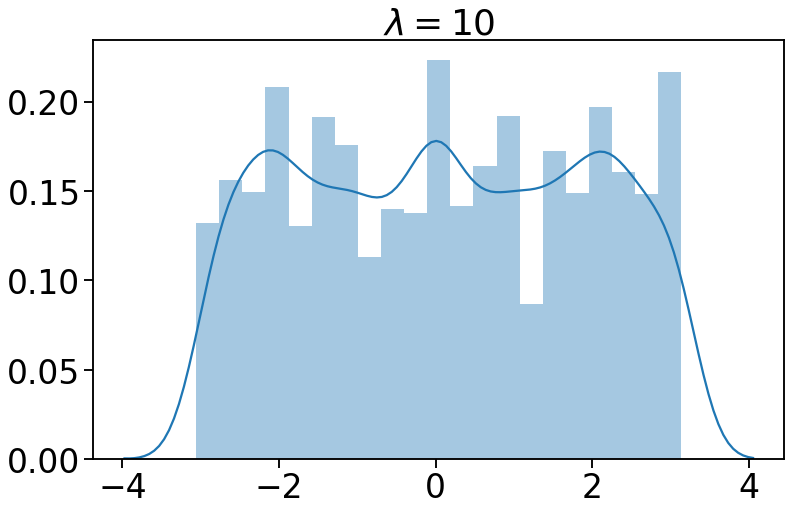

In [33]:
N = 30000
Xs = []
lam = 10
angles = []
#for i in range(0, 10000):
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
sns.set_context('talk', font_scale=2)
fig, ax = plt.subplots(figsize=(12,8))
##ax.hist(angles)
sns.distplot(angles)
ax.set_title('$\lambda={}$'.format(lam))
fig.tight_layout()
fig.savefig('theta_poisson_lambda_{}.png'.format(lam))

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


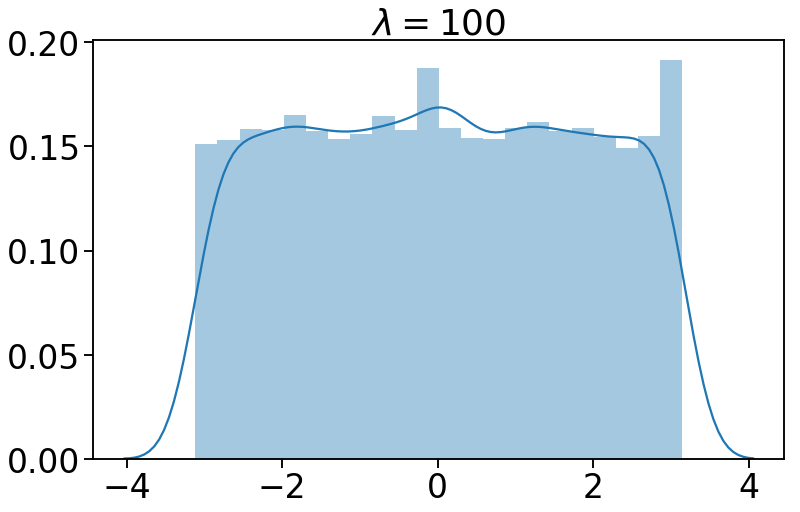

In [34]:
N = 30000
Xs = []
lam = 100
angles = []
#for i in range(0, 10000):
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
sns.set_context('talk', font_scale=2)
fig, ax = plt.subplots(figsize=(12,8))
##ax.hist(angles)
sns.distplot(angles)
ax.set_title('$\lambda={}$'.format(lam))
fig.tight_layout()
fig.savefig('theta_poisson_lambda_{}.png'.format(lam))

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


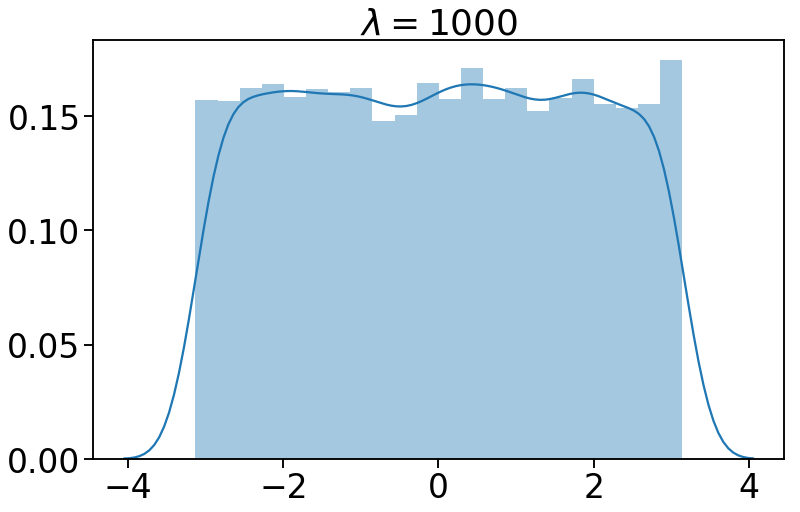

In [35]:
N = 30000
Xs = []
lam = 1000
angles = []
#for i in range(0, 10000):
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
sns.set_context('talk', font_scale=2)
fig, ax = plt.subplots(figsize=(12,8))
##ax.hist(angles)
sns.distplot(angles)
ax.set_title('$\lambda={}$'.format(lam))
fig.tight_layout()
fig.savefig('theta_poisson_lambda_{}.png'.format(lam))

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


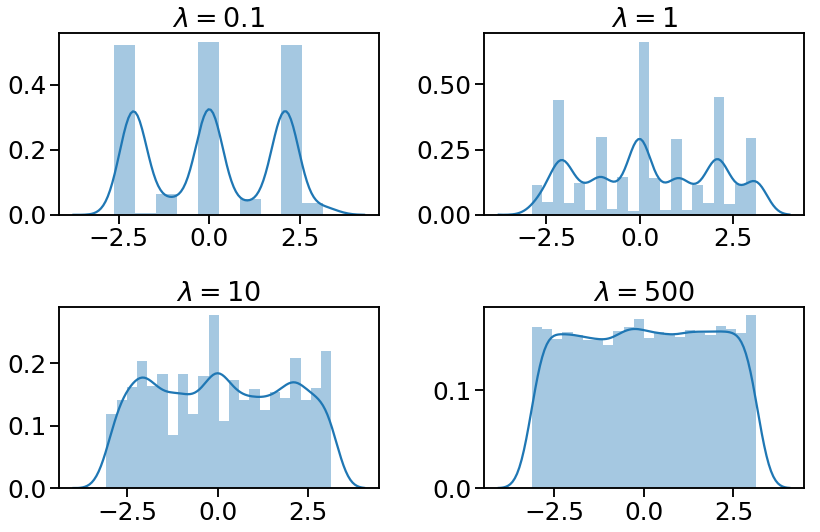

In [43]:
N = 30000
Xs = []

angles = []
sns.set_context('talk', font_scale=1.5)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))
#for i in range(0, 10000):
lam = 0.1
ax = axes[0,0]
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
sns.distplot(angles, ax=ax)
ax.set_title('$\lambda={}$'.format(lam))

lam = 1
ax = axes[0,1]
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
sns.distplot(angles, ax=ax)
ax.set_title('$\lambda={}$'.format(lam))


lam = 10
ax = axes[1,0]
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
sns.distplot(angles, ax=ax)
ax.set_title('$\lambda={}$'.format(lam))

lam = 500
ax = axes[1, 1]
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
sns.distplot(angles, ax=ax)
ax.set_title('$\lambda={}$'.format(lam))


fig.tight_layout()

fig.savefig('theta_poisson_lambda_all.png')

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'1000')

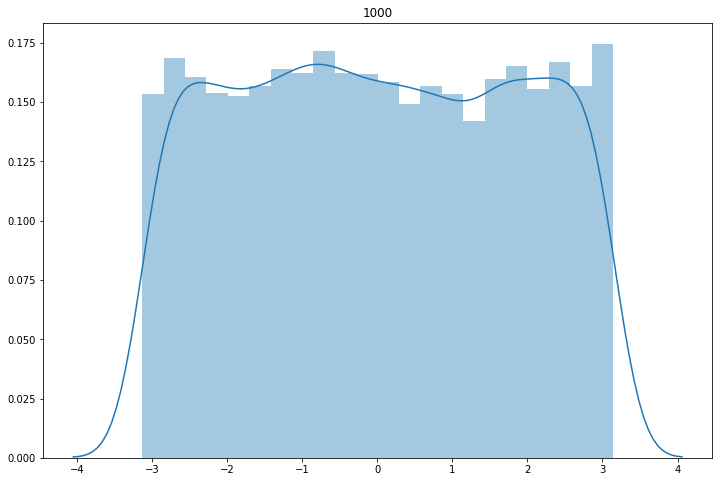

In [25]:
lam = 1000
angles = []
#for i in range(0, 10000):
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
fig, ax = plt.subplots(figsize=(12,8))
##ax.hist(angles)
sns.distplot(angles)
ax.set_title(lam)

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'0.1')

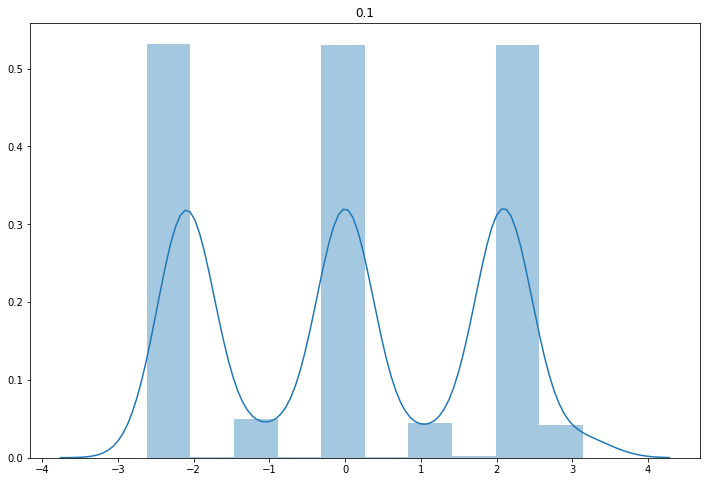

In [26]:
lam = 0.1
angles = []
#for i in range(0, 10000):
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
fig, ax = plt.subplots(figsize=(12,8))
##ax.hist(angles)
sns.distplot(angles)
ax.set_title(lam)

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'0.01')

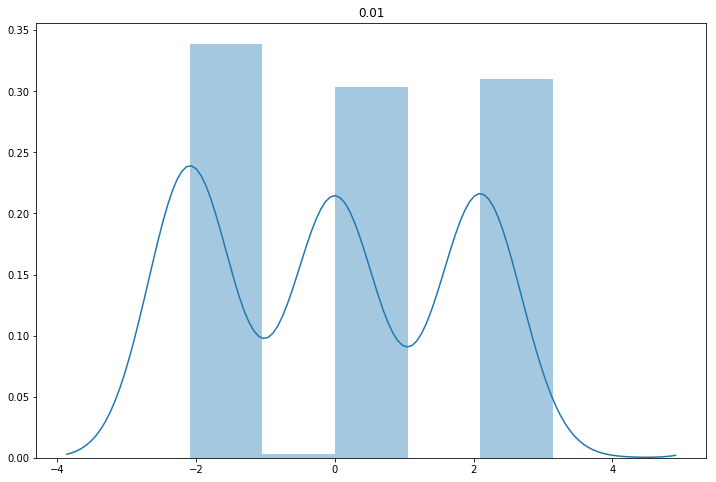

In [27]:
lam = 0.01
angles = []
#for i in range(0, 10000):
Xs = simulate_X_poisson(lam, N)
angles = angle(Xs, 0)
fig, ax = plt.subplots(figsize=(12,8))
##ax.hist(angles)
sns.distplot(angles)
ax.set_title(lam)

In [ ]:
import numpy as np
import scipy.stats as st

alpha = 0.05
p = 1 - alpha

dof = np.arange(5, 100)
n = dof / 2.

C_1 = 1 - alpha ** (1. / (n - 1))

fval = st.f.ppf(p, 2, dof - 2)
C_2 = fval / (n - 1. + fval)